<a href="https://colab.research.google.com/github/Arta-DS/py_analytics_HWs/blob/main/%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B8_%D0%BE%D0%BF%D0%B8%D1%81%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0d1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('salary_dataset.csv')
df


,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
...,...,...,...,...,...,...,...,...,...
6699,6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


In [3]:
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [5]:
df.isna().mean()*100

Age                    0.029833
Gender                 0.029833
Education Level        0.044749
Job Title              0.029833
Years of Experience    0.044749
Salary                 0.074582
Country                0.000000
Race                   0.000000
dtype: float64

In [6]:
df['Gender'].value_counts()

Gender
Male      3674
Female    3014
Other       14
Name: count, dtype: int64

In [7]:
df['Education Level'].value_counts(normalize=True)

Education Level
Bachelor's Degree    0.338308
Master's Degree      0.234741
PhD                  0.204149
Bachelor's           0.112819
High School          0.066856
Master's             0.042979
phD                  0.000149
Name: proportion, dtype: float64

In [11]:
x = df[df["Education Level"]=="Bachelor's"]
x['Education Level'] = "Bachelor's Degree"
df[df["Education Level"]=="Bachelor's"] = x
x = df[df["Education Level"]=="Master's"]
x['Education Level'] = "Master's Degree"
df[df["Education Level"]=="Master's"] = x
x = df[df["Education Level"]=="phD"]
x['Education Level'] = "PhD"
df[df["Education Level"]=="phD"] = x
df.head()

<ipython-input-11-7052914d8840>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Education Level'] = "PhD"


,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's Degree,Director,20.0,200000.0,USA,Asian


Education Level
Bachelor's Degree    0.451127
Master's Degree      0.277720
PhD                  0.204298
High School          0.066856
Name: proportion, dtype: float64

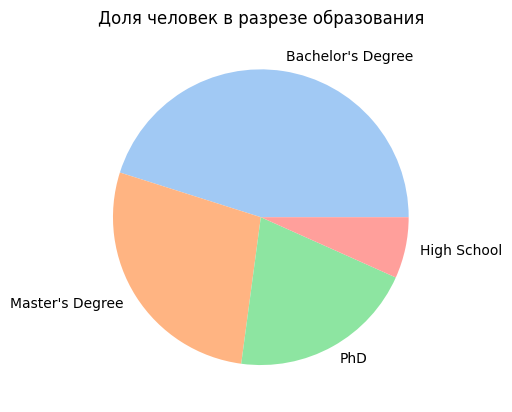

In [12]:
Edu = df['Education Level'].value_counts(normalize=True)
display(Edu)
colors = sns.color_palette('pastel')
plt.pie(Edu, labels=Edu.index, colors=colors)
plt.title('Доля человек в разрезе образования')
plt.show()

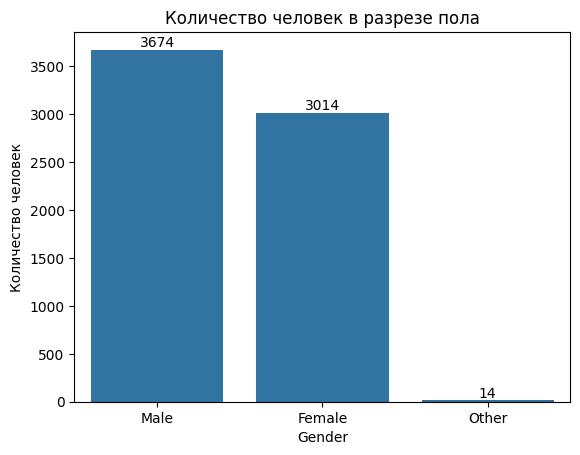

In [13]:
ax = sns.countplot(data=df, x='Gender')
ax.bar_label(ax.containers[0])
plt.title('Количество человек в разрезе пола')
plt.ylabel('Количество человек')
plt.show()

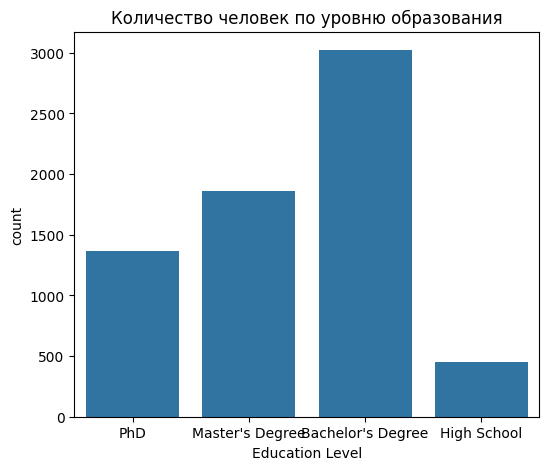

In [14]:
plt.figure(figsize=[6,5])
sns.countplot(data=df, x='Education Level', order=["PhD", "Master's Degree", "Bachelor's Degree", "High School"])
plt.title('Количество человек по уровню образования')
plt.show()

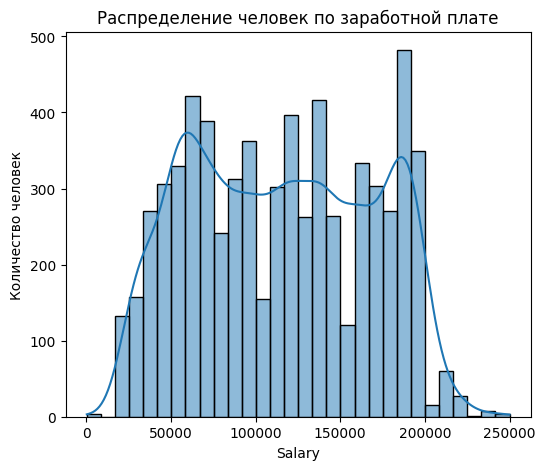

In [15]:
# Кривая плотности распределения

plt.figure(figsize=[6,5])
sns.histplot(data=df, x='Salary', bins=30, kde=True)
plt.title('Распределение человек по заработной плате')
plt.ylabel('Количество человек')
plt.show()

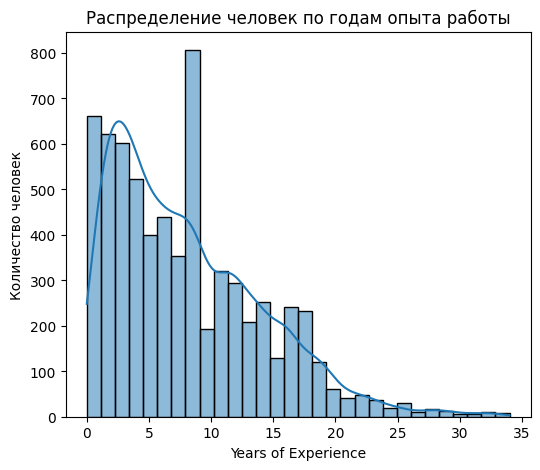

In [16]:
plt.figure(figsize=[6,5])
sns.histplot(data=df, x='Years of Experience', bins=30, kde=True)
plt.title('Распределение человек по годам опыта работы')
plt.ylabel('Количество человек')
plt.show()

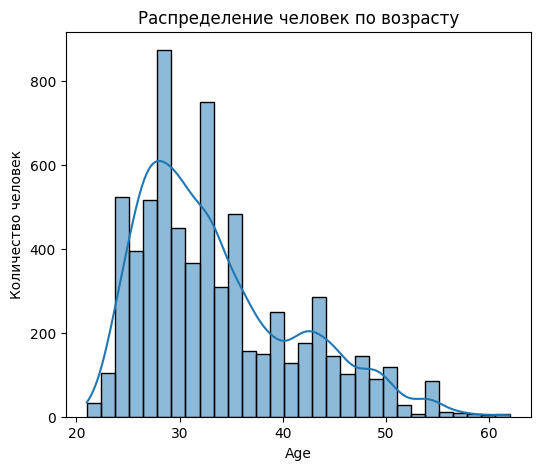

In [17]:
plt.figure(figsize=[6,5])
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Распределение человек по возрасту')
plt.ylabel('Количество человек')
plt.show()


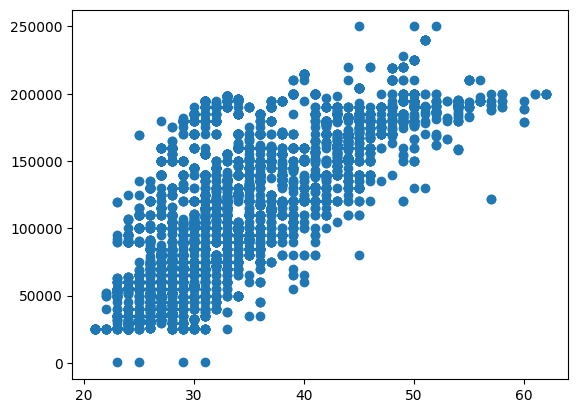

In [18]:
x = df['Age']
y = df['Salary']
plt.scatter(x,y)

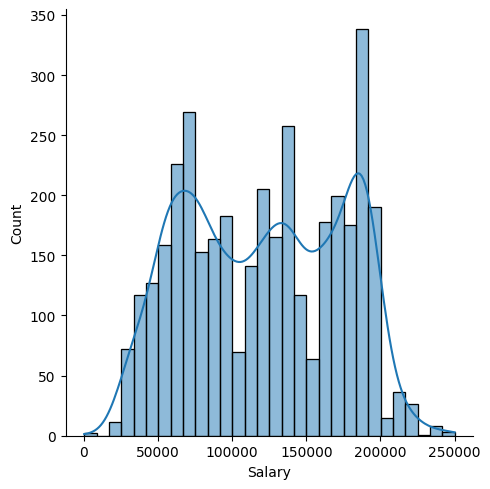

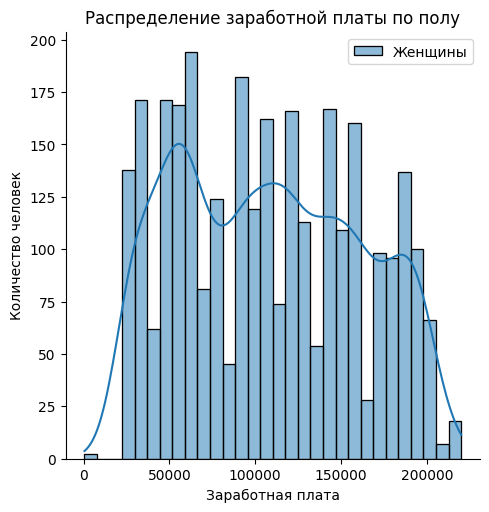

In [19]:
male_salary = df[df['Gender'] == 'Male']['Salary']
female_salary = df[df['Gender'] == 'Female']['Salary']

sns.displot(male_salary, kde=True, bins=30, label='Мужчины')
sns.displot(female_salary, kde=True, bins=30, label='Женщины')

# Настраиваем график
plt.title('Распределение заработной платы по полу')
plt.xlabel('Заработная плата')
plt.ylabel('Количество человек')
plt.legend()
plt.show()

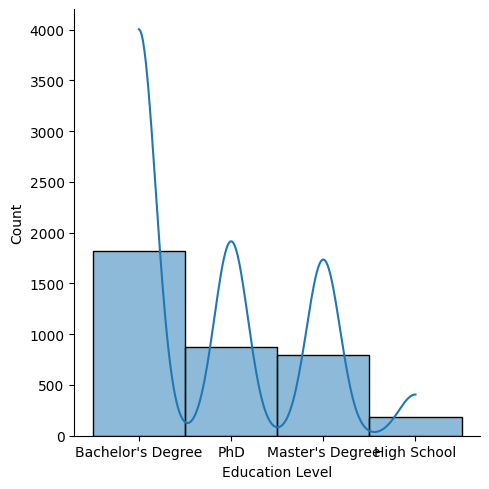

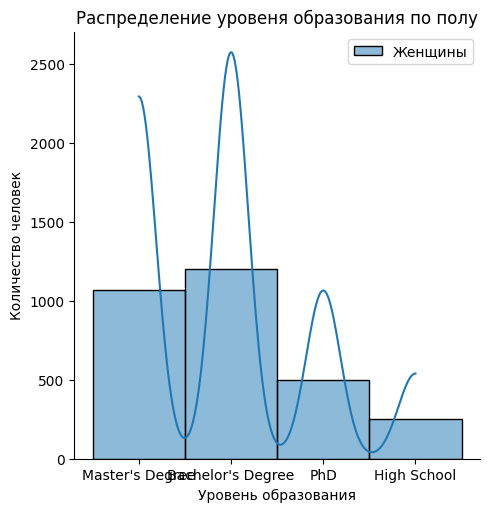

In [20]:
male_education = df[df['Gender'] == 'Male']['Education Level']
female_education = df[df['Gender'] == 'Female']['Education Level']

sns.displot(male_education, kde=True, bins=25, label='Мужчины')
sns.displot(female_education, kde=True, bins=25, label='Женщины')

plt.title('Распределение уровеня образования по полу')
plt.xlabel('Уровень образования')
plt.ylabel('Количество человек')
plt.legend()
plt.show()

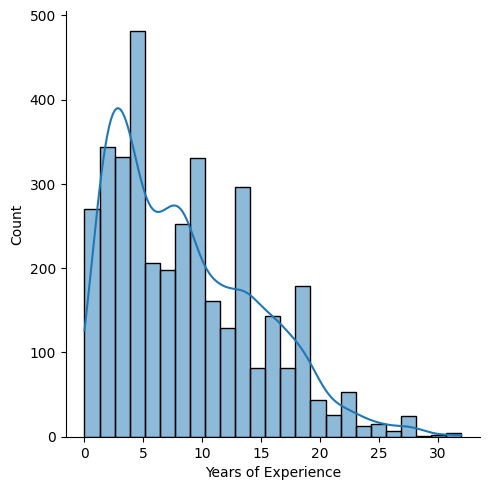

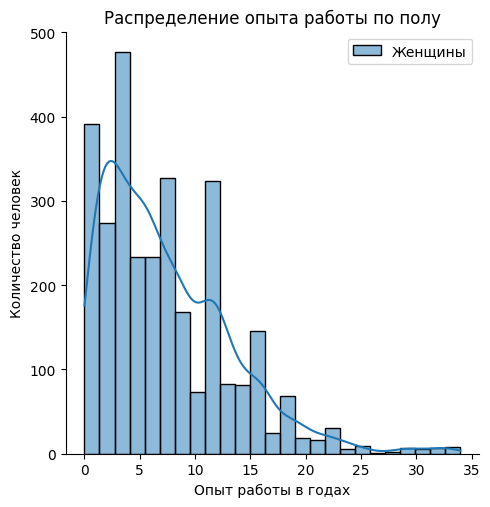

In [21]:
male_exp = df[df['Gender'] == 'Male']['Years of Experience']
female_exp = df[df['Gender'] == 'Female']['Years of Experience']

sns.displot(male_exp, kde=True, bins=25, label='Мужчины')
sns.displot(female_exp, kde=True, bins=25, label='Женщины')

plt.title('Распределение опыта работы по полу')
plt.xlabel('Опыт работы в годах')
plt.ylabel('Количество человек')
plt.legend()
plt.show()

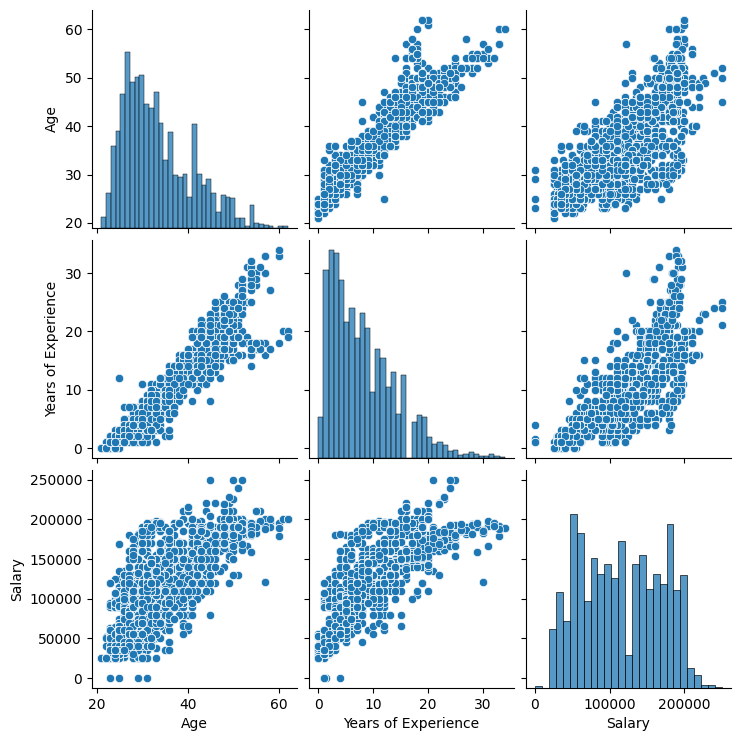

In [22]:
sns.pairplot(data=df)
plt.show()